## <center><u>Predicting wine quality</u></center>

### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

##### Load the dataset

In [2]:
data = pd.read_csv('winequality.csv')
dt = data.head(20)
dt

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,red
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,red
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,red
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,red


##### Checking for the null values in the dataset

In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

##### Describing the dataset

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


##### Displaying the size of the dataset

In [6]:
data.size

90958

##### Displaying the shape of the dataset

In [7]:
data.shape

(6497, 14)

In [8]:
data.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
good                    6497
color                   6497
dtype: int64

In [9]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.049447
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.151714
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.054444
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.063992
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.161781
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.014767
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.051226
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.275441
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.028149
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.033971


### Visualize the distributions of various features and correlations between them.

__Univariate Analysis__

Univariate refers to an expression of only one variable. This is the simplest method of analysis.

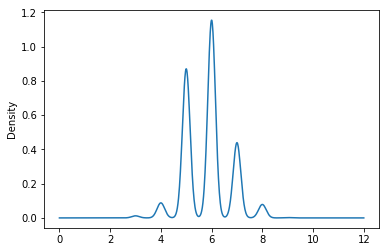

In [92]:
data['quality'].plot(kind = 'kde')

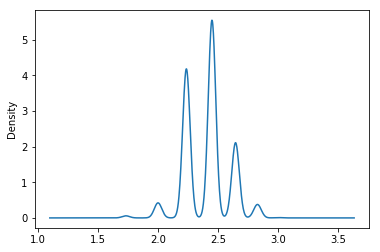

In [100]:
#plot root mean square
rms_dt = np.power(data['quality'],1/2)
rms_dt.plot(kind = 'kde')

In [101]:
rms_dt2=preprocessing.scale(rms_dt)
rms_dt2

array([-0.93112497, -0.93112497, -0.93112497, ...,  0.24329941,
        1.3232941 ,  0.24329941])

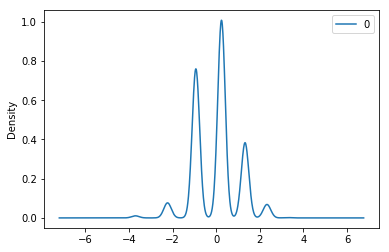

In [102]:
rms_dt2=pd.DataFrame(rms_dt2)
rms_dt2.plot(kind='kde')

- After applying root mean square to normalise, Now the graph is better.

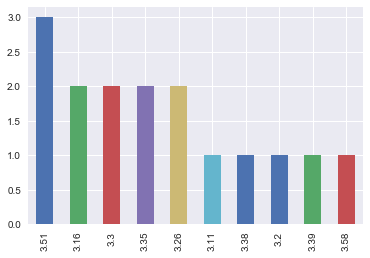

In [117]:
dt['pH'].value_counts().head(10).plot.bar()
sns.despine()

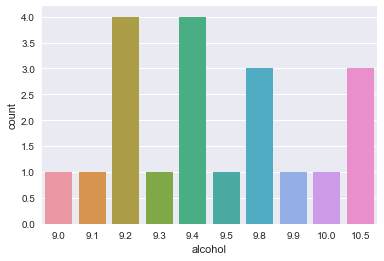

In [82]:
sns.countplot(x = 'alcohol', data = dt)

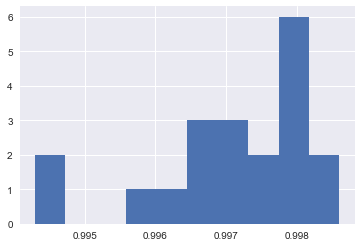

In [83]:
plt.hist(x = 'density', data = dt)
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


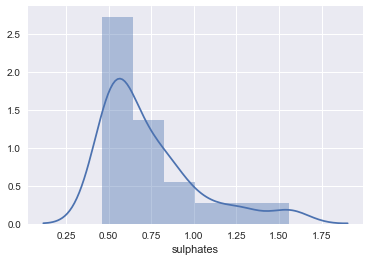

In [85]:
sns.distplot(dt['sulphates'])
sns.despine()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


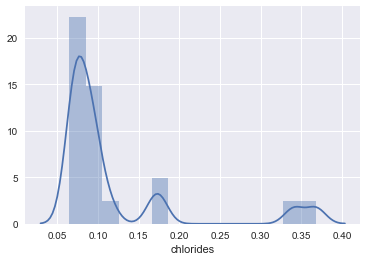

In [86]:
sns.distplot(dt['chlorides'])
sns.despine()

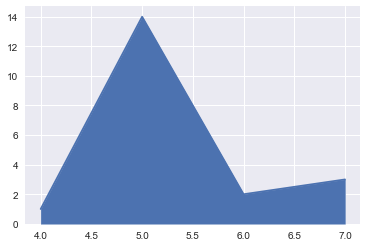

In [148]:
dt['quality'].value_counts().sort_index().plot.area()
sns.despine()

__Bivariate Analysis__

Bivariate refers to an expression of only two variable. It tells us about the relation between the two variable.

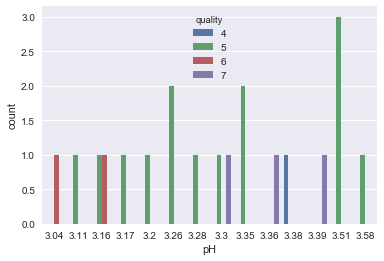

In [89]:
sns.countplot(hue = 'quality' , x = 'pH', data = dt)

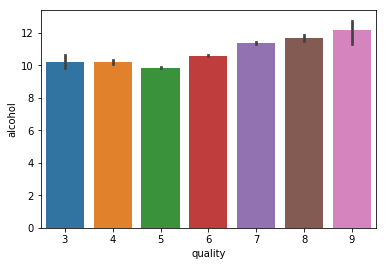

In [85]:
#Alcohol level also goes higher as the quality of wine increases
sns.barplot(x = 'quality', y = 'alcohol', data = data)

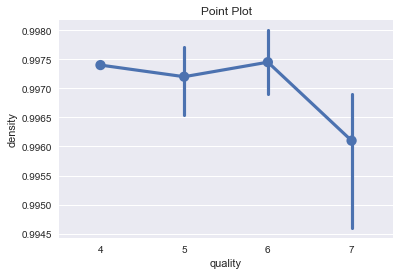

In [70]:
sns.pointplot(x = 'quality' , y = 'density', data = dt)
plt.title('Point Plot')
sns.despine()

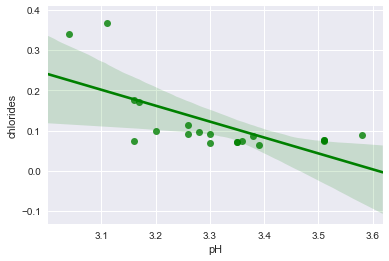

In [149]:
sns.regplot(x = 'pH', y='chlorides',data = dt, color = 'green')
sns.despine()

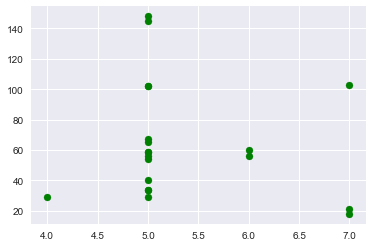

In [93]:
plt.scatter(x = 'quality', y='total sulfur dioxide',data = dt, color= 'green')

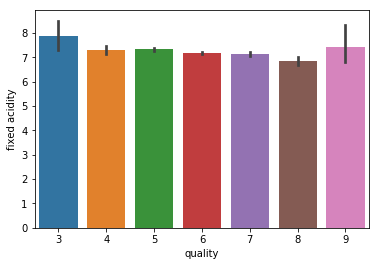

In [79]:
#Here we see that fixed acidity does not give any specification to classify the quality.
sns.barplot(x = 'quality', y = 'fixed acidity', data = data)

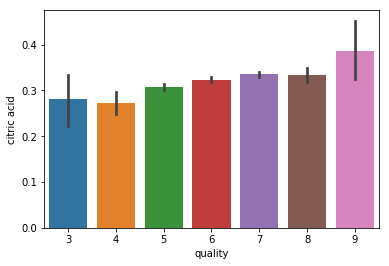

In [78]:
#Composition of citric acid go higher as we go higher in the quality of the wine
sns.barplot(x = 'quality', y = 'citric acid', data = data)

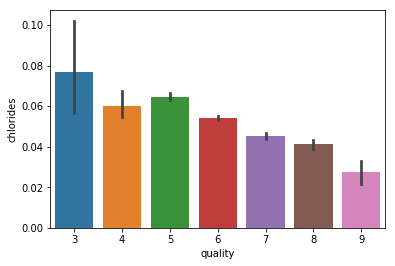

In [80]:
#Composition of chloride also go down as we go higher in the quality of the wine
sns.barplot(x = 'quality', y = 'chlorides', data = data)

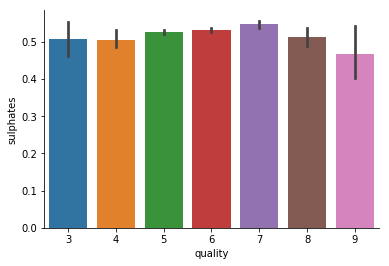

In [88]:
# Sulphates level goes higher with the quality of wine.
sns.barplot(x = 'quality', y = 'sulphates', data = data)
sns.despine()

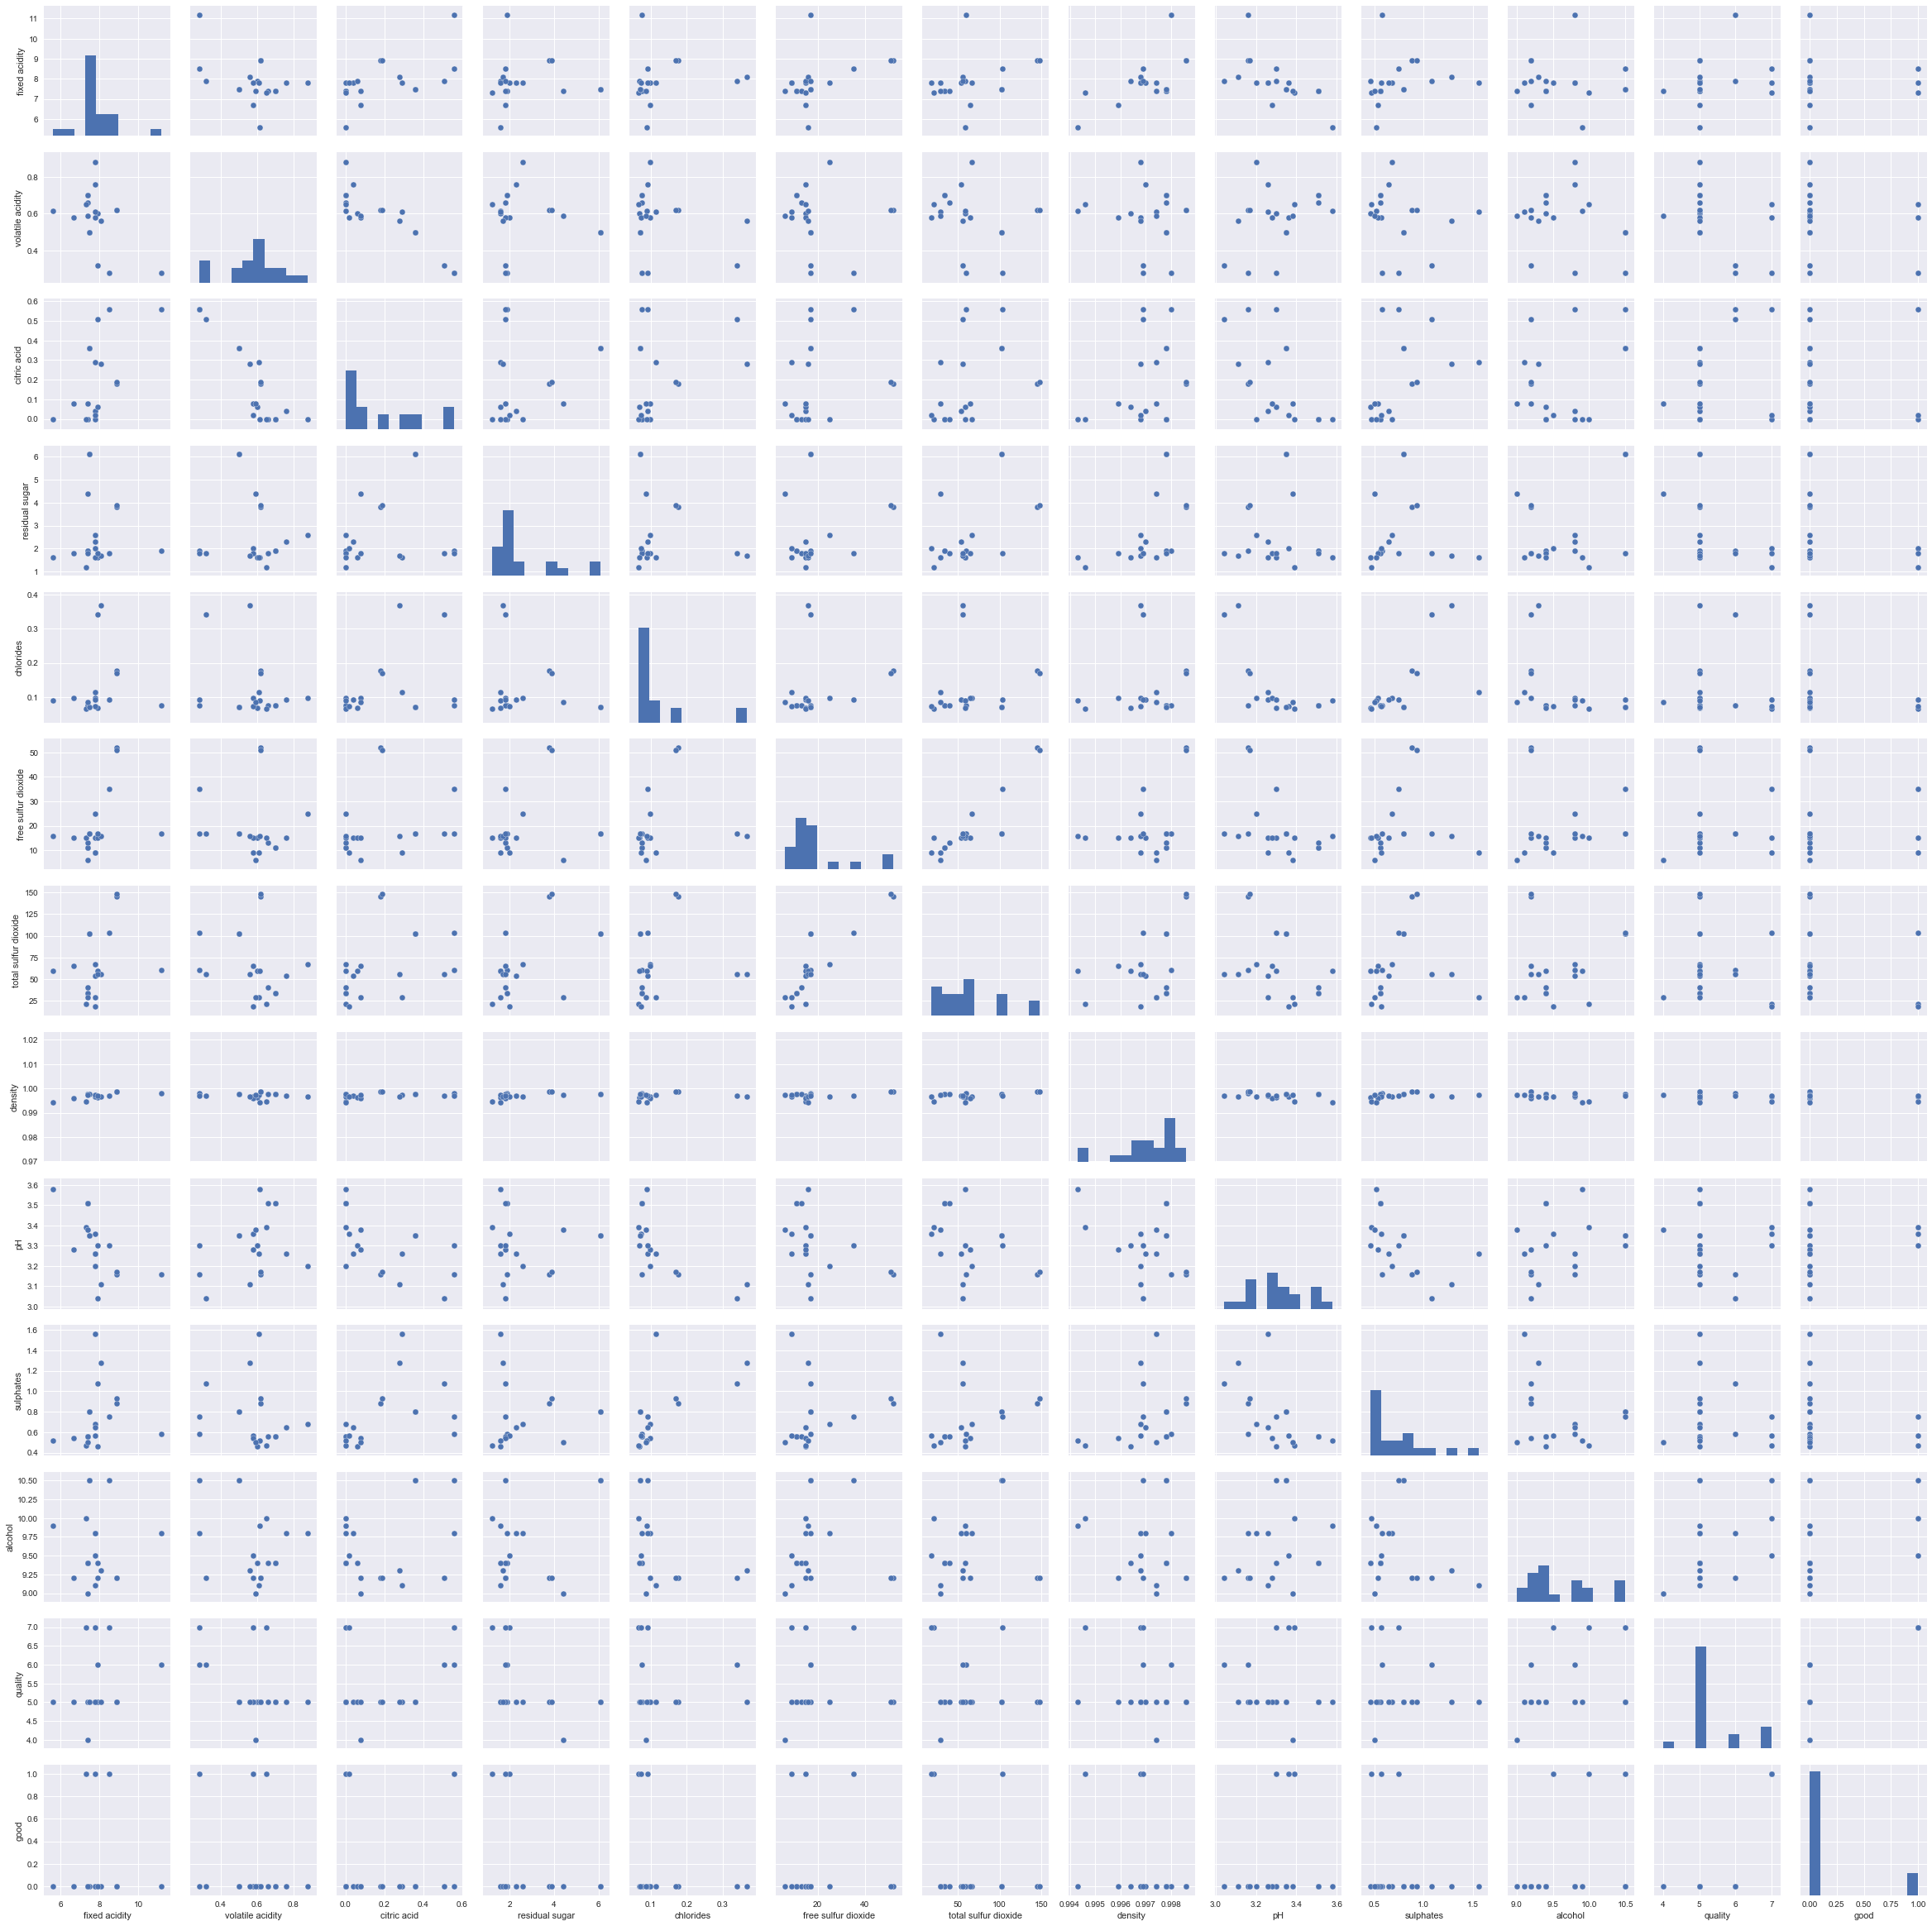

In [150]:
sns.pairplot(dt)

__Multivariate Analysis__

Multivariate refers to an expression of more then two variable.

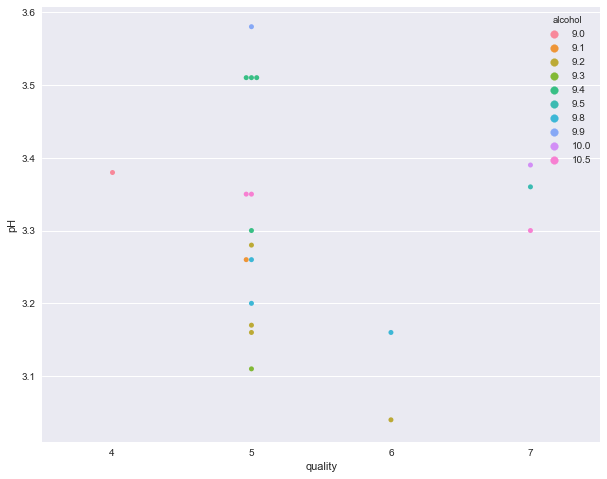

In [94]:
plt.figure(figsize=(10,8))
sns.swarmplot(x= 'quality', y='pH', data= dt,hue='alcohol')

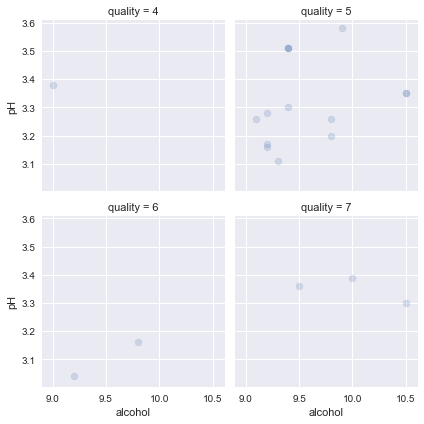

In [95]:
grid = sns.FacetGrid(dt, col='quality',col_wrap=2)
grid.map(plt.scatter,'alcohol','pH',alpha = 0.2)
sns.despine()

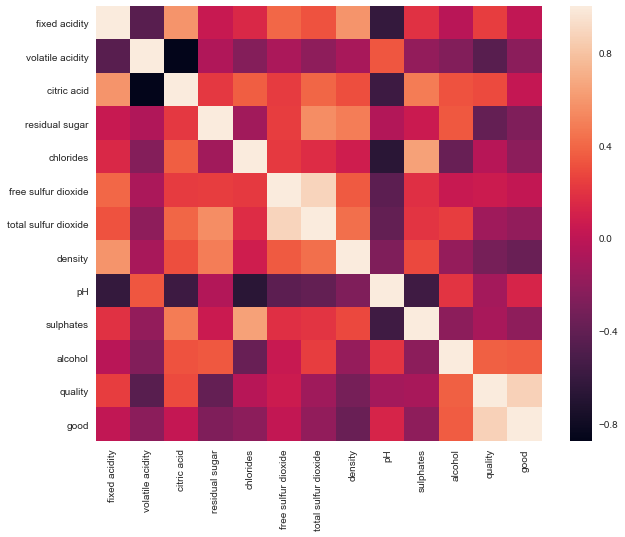

In [71]:
plt.figure(figsize=(10,8))
corr = dt.corr()
sns.heatmap(corr)

### Feature engineering to extract the correct features for the model.

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. Feature engineering requires extracting the relevant information from the data.

In [6]:
# importing the required libraries.
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.tree import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import *
from sklearn.metrics import *

In [66]:
# Now seperate the dataset as response variable and feature variabes.
X = data.drop(['quality','color'], axis = 1)
Y = data['quality']
# Print the Shape of X and Y dataset.
X.shape, Y.shape

((6497, 12), (6497,))

##### Split the dataset into training and testing sets using train_test_split()

In [67]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.2,random_state=15)

#### Linear Regression

linear regression is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables.

In [68]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [69]:
pred = reg.predict(x_test)

In [70]:
result = pd.DataFrame({"Predicted":pred,"Actual":y_test})
result.head()

,Predicted,Actual
4942,6.906142,7
5035,5.853853,6
1204,7.169731,7
2360,5.580779,6
3114,5.713886,6


In [71]:
reg.score(x_test,y_test)*100

62.71225135334608

#### Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

In [141]:
rfr = RandomForestRegressor(random_state=10)

In [142]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [143]:
rfr_pred=rfr.predict(x_test)

In [75]:
rfr.score(x_test,y_test)*100

71.07147837481371

#### Random Forest Classifier

In [17]:
rfc = RandomForestClassifier(random_state=21)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=21, verbose=0, warm_start=False)

In [18]:
rfc_pred = rfc.predict(x_test)

In [33]:
# Classification Report
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.20      0.06      0.10        47
          5       0.67      0.74      0.70       438
          6       0.78      0.77      0.77       571
          7       0.86      0.98      0.92       196
          8       0.81      0.30      0.44        43
          9       0.00      0.00      0.00         1

avg / total       0.73      0.75      0.73      1300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
# Confusion Matrix
print(confusion_matrix(y_test, rfc_pred))

[[  0   0   2   2   0   0   0]
 [  0   3  29  15   0   0   0]
 [  0   6 323 109   0   0   0]
 [  0   6 128 437   0   0   0]
 [  0   0   0   0 193   3   0]
 [  0   0   0   0  30  13   0]
 [  0   0   0   0   1   0   0]]


In [21]:
print('Random forest gives the accuracy of', rfc.score(x_test,y_test)*100)

Random forest gives the accuracy of 74.53846153846155


#### Decision Tree Classifier

In [146]:
classify = DecisionTreeClassifier(criterion = 'gini', random_state=1)
classify.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [147]:
predict = classify.predict(x_test)

In [149]:
# Classification Report
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.24      0.21      0.23        47
          5       0.65      0.71      0.68       438
          6       0.78      0.73      0.75       571
          7       0.88      0.88      0.88       196
          8       0.49      0.47      0.48        43
          9       0.00      0.00      0.00         1

avg / total       0.72      0.71      0.72      1300



In [150]:
# Confusion Matrix
print(confusion_matrix(y_test, predict))

[[  0   2   2   0   0   0   0]
 [  3  10  25   9   0   0   0]
 [  2  20 311 105   0   0   0]
 [  5   9 143 414   0   0   0]
 [  0   0   0   0 173  21   2]
 [  0   0   0   0  23  20   0]
 [  0   0   0   0   1   0   0]]


In [77]:
# AccuracyScore
accuracy_score(y_test, predict)*100

71.38461538461539

#### Support Vector Classifier

support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [152]:
from sklearn.svm import SVC
svc1 = SVC(kernel = 'linear')

In [153]:
svc1.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
predict1 = svc1.predict(x_test)

In [155]:
# Classification Report
print(classification_report(y_test, predict1))

             precision    recall  f1-score   support

          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        47
          5       0.62      0.62      0.62       438
          6       0.70      0.76      0.73       571
          7       0.82      1.00      0.90       196
          8       0.00      0.00      0.00        43
          9       0.00      0.00      0.00         1

avg / total       0.64      0.69      0.67      1300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [156]:
# Confusion Matrix
print(confusion_matrix(y_test, predict))

[[  0   2   2   0   0   0   0]
 [  3  10  25   9   0   0   0]
 [  2  20 311 105   0   0   0]
 [  5   9 143 414   0   0   0]
 [  0   0   0   0 173  21   2]
 [  0   0   0   0  23  20   0]
 [  0   0   0   0   1   0   0]]


In [158]:
metrics.accuracy_score(y_test,predict1)*100

69.46153846153847

#### Gradient Boosting Regressor

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [163]:
gbr = GradientBoostingRegressor(n_estimators=47,random_state=20)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
gbr.score(x_test,y_test)*100

65.00414051762118

#### Gaussian Naive Bayes

In [167]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [168]:
model.fit(x_train,y_train)

GaussianNB(priors=None)

In [169]:
GNB_pred = model.predict(x_test)

In [170]:
# Classification Report
print(classification_report(y_test, GNB_pred))

             precision    recall  f1-score   support

          3       0.09      0.50      0.15         4
          4       0.08      0.06      0.07        47
          5       0.57      0.57      0.57       438
          6       0.67      0.67      0.67       571
          7       0.82      0.95      0.88       196
          8       0.38      0.07      0.12        43
          9       0.00      0.00      0.00         1

avg / total       0.63      0.63      0.63      1300



In [171]:
# Confusion Matrix
print(confusion_matrix(y_test, GNB_pred))

[[  2   0   2   0   0   0   0]
 [  2   3  21  21   0   0   0]
 [ 10  16 248 164   0   0   0]
 [  8  17 164 382   0   0   0]
 [  0   0   0   0 187   5   4]
 [  0   0   0   0  40   3   0]
 [  0   0   0   0   1   0   0]]


In [92]:
metrics.accuracy_score(y_test, GNB_pred)*100

63.46153846153846

#### Validation Score for random forest

In [4]:
from sklearn.model_selection import cross_val_score

In [31]:
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 15)
rfc_eval.mean()*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)


76.391113234512

__Random forest accuracy increases from 74.538% to 76.391% using cross validation score__

### Summary

Following work flow have been performed.
1. Perform data cleaning.
2. Exploratory Data Analysis on the data.
3. Visualize distributions and correlation of features.
4. Build a regression model taking the selected features through feature engineering.


- We did exploratory data analysis on the dataset to see the visualisations and the dependencies of the features on one another.

- We even performed feature engineering to extract the meaningful data out of the dataset given.

- Then we applied different models on the dataset to find the best model to define the dataset.



### Result:

Accuracy score of different regression model are:

    Linear Regression:           62.7122%
    Random Forest Regressor:     71.071%
    Random Forest Classifier:    74.538%
    Decision Tree Classifier:    71.384%
    Support Vector Classifier:   69.461%
    Gradient Boosting Regressor: 65.004%
    Gaussian Naive Bayes:        63.461%
    
    Validation Score for random forest classifier: 76.391%